In [7]:
import ara
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [8]:
#-----------
# Read Data
#-----------

data = ara._open("/Users/nathankutz/ARAdata/simVectors010105.h5")
v1 = data["v1"]
v2 = data["v2"]
v = np.concatenate((v1, v2), axis=-1)
t1 = data["t1"]
t2 = data["t2"]
x = data["x"]
y = data["y"]

In [9]:
print(ara.time_misalignment(t1, t2))

0.038038496791934


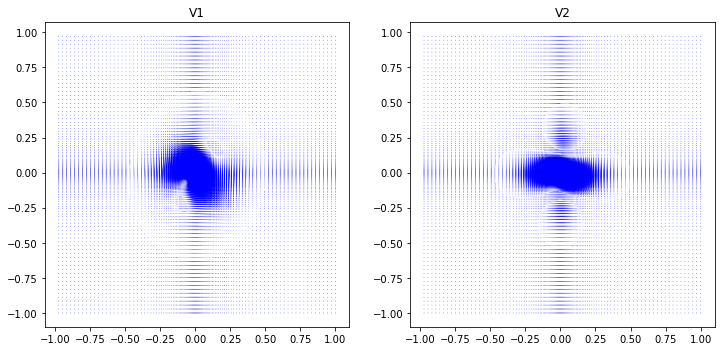

'\n# Create Animation Plot/File\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=True, sharey=True)\nplt.suptitle(\'Vectors, $it$ = \'+ str(0), fontsize=14)\nax1 = axes[0]\nax2 = axes[1]\n\nu1, v1 = Vx1[:,:,0], Vy1[:,:,0]\nu2, v2 = Vx2[:,:,0], Vy2[:,:,0]\nax1.quiver(x, y, u1, v1, color=\'b\', alpha=1)#, scale=1)\nax2.quiver(x, y, u2, v2, color=\'g\', alpha=1)#, scale=1)\nax1.set_title(\'V1, $t$ = \'+ str(t1[0]))\nax2.set_title(\'V2, $t$ = \'+ str(t2[0]))\nax1.set_aspect(\'equal\')\nax2.set_aspect(\'equal\')\n\n# To animate the quiver, we can change the u and v values, in animate() method.\ndef animate(it):\n    print("it = ",it)\n    u1, v1 = Vx1[:,:,it], Vy1[:,:,it]\n    u2, v2 = Vx2[:,:,it], Vy2[:,:,it]\n    ax1.quiver(x, y, u1, v1, color=\'b\', alpha=1)#, scale=1)\n    ax2.quiver(x, y, u2, v2, color=\'g\', alpha=1)#, scale=1)\n    ax1.set_title(\'V1, $t$ = \'+ str(t1[it]))\n    ax2.set_title(\'V2, $t$ = \'+ str(t2[it]))\n    plt.suptitle(\'Vectors, $it$ = \'+ str(i

In [10]:
#"""
# Create Single Frame Plot
fig = plt.figure(figsize =(12, 6))

ti = 100
ax = fig.add_subplot(121)
ax.quiver(x,y,np.asarray(v1[...,ti,0]), np.asarray(v1[...,ti,1]), color='b', alpha=1)
ax.set_title('V1')
ax.set_aspect('equal')

ax = fig.add_subplot(122)
ax.quiver(x,y,np.asarray(v2[...,ti,0]), np.asarray(v2[...,ti,0]), color='b', alpha=1)
ax.set_title('V2')
ax.set_aspect('equal')

plt.show()
#"""

"""
# Create Animation Plot/File
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=True, sharey=True)
plt.suptitle('Vectors, $it$ = '+ str(0), fontsize=14)
ax1 = axes[0]
ax2 = axes[1]

u1, v1 = Vx1[:,:,0], Vy1[:,:,0]
u2, v2 = Vx2[:,:,0], Vy2[:,:,0]
ax1.quiver(x, y, u1, v1, color='b', alpha=1)#, scale=1)
ax2.quiver(x, y, u2, v2, color='g', alpha=1)#, scale=1)
ax1.set_title('V1, $t$ = '+ str(t1[0]))
ax2.set_title('V2, $t$ = '+ str(t2[0]))
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# To animate the quiver, we can change the u and v values, in animate() method.
def animate(it):
    print("it = ",it)
    u1, v1 = Vx1[:,:,it], Vy1[:,:,it]
    u2, v2 = Vx2[:,:,it], Vy2[:,:,it]
    ax1.quiver(x, y, u1, v1, color='b', alpha=1)#, scale=1)
    ax2.quiver(x, y, u2, v2, color='g', alpha=1)#, scale=1)
    ax1.set_title('V1, $t$ = '+ str(t1[it]))
    ax2.set_title('V2, $t$ = '+ str(t2[it]))
    plt.suptitle('Vectors, $it$ = '+ str(it), fontsize=14)
  
# Create an animation object
ani = animation.FuncAnimation(fig, animate, interval=1, frames = range(0,nt,10), repeat=False)

# write animation as mp4
writer = animation.FFMpegWriter(fps=30)
ani.save('vector_animation.mp4', writer=writer)

# Display the figure
plt.show()
"""



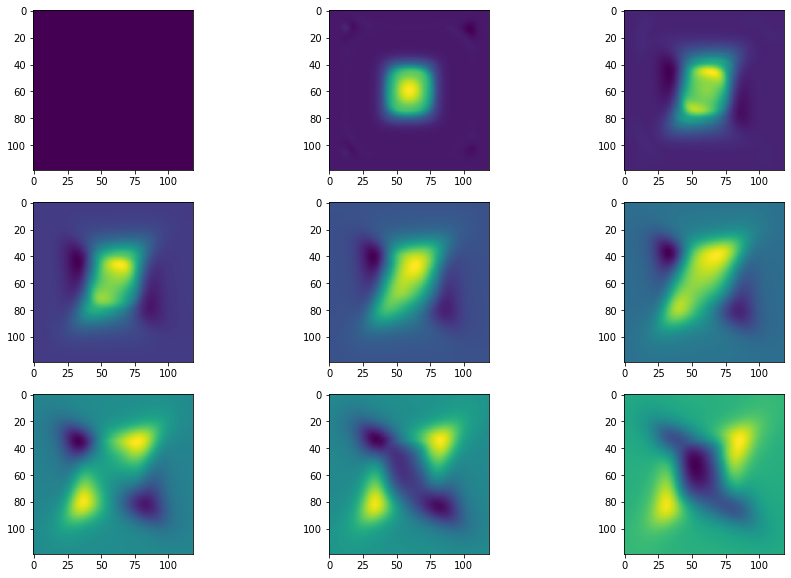

In [11]:
fig = plt.figure(figsize=(15, 10))
for k in range(9):
    uplot = v1[:,:,10*k, 0]
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot)

# SVD

In [ ]:
left, s, right = ara.svd_time(v)

In [ ]:
first_reshaped = np.asarray(np.reshape(left[:,0], (len(x), len(y), 6)))
second_reshaped = np.asarray(np.reshape(left[:,1], (len(x), len(y), 6)))

In [ ]:
u1x, s1x, v1x = ara.svd_time(v[..., 0])

In [ ]:
fig = plt.figure(figsize=(15, 10))
for k in range(9):
    Up = u1x[:, k].reshape((119, 119))
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot)



In [ ]:
fig = plt.figure(figsize =(12, 6))
ti = 100
ax = fig.add_subplot(121)
ax.quiver(x,y,second_reshaped[...,0],second_reshaped[...,1], color='b', alpha=1)
ax.set_title('V1')
ax.set_aspect('equal')

ax = fig.add_subplot(122)
ax.quiver(x,y,second_reshaped[...,3], second_reshaped[...,4], color='b', alpha=1)
ax.set_title('V2')
ax.set_aspect('equal')



In [ ]:
plt.plot(right[:,0])

In [ ]:
nomalized_singvals=s/np.sum(s)
plt.stem(nomalized_singvals, markerfmt='ro')
plt.xlim(-2, 20)
plt.show()

In [ ]:
nomalized_singvals=s1x/np.sum(s1x)
plt.stem(nomalized_singvals, markerfmt='ro')
plt.xlim(-2, 20)
plt.show()

In [ ]:
for k in range(6):
    plt.plot(v1x[k,:], color=f"C{k}")

In [ ]:
for k in range(6):
    ax = fig.add_subplot(3, 3, k+1)
    plt.plot(right[k,:])

# SINDy

In [ ]:
model = ps.SINDy(
    differentiation_method = ps.SmoothedFiniteDifference(),
    feature_library = ps.PolynomialLibrary(degree=1),
    feature_names = [f"v{mode}" for mode in range(6)],
    optimizer = ps.STLSQ(alpha=.3, threshold=.1),
)
model.fit(v1x[:6].T, t=t1)
v1x_sim = model.simulate(x0=v1x[:6, 0], t=t1)

In [ ]:
model.print()

In [3]:
lin_model = np.array([
    [0.000, -5.126,  0.000,  3.032,  2.093, -1.604],
    [5.294,  0.000,  0.000, -3.906, -1.695, -1.088],
    [1.240, -0.790,  1.503, -2.039, -4.121, -3.878],
    [-16.184, -10.667, 24.540, -8.698, -6.114, 18.044],
    [-1.803, 1.759,  5.105,  3.088,  0.000,  -19.190],
    [-10.362, -12.342, 25.040, -20.846, 16.332, 4.998]
])

In [4]:
eigvals, eigvecs = np.linalg.eig(lin_model)

Text(0.5, 1.0, 'Slow growth, fast oscillations\n and Fast decay, slow oscillations')

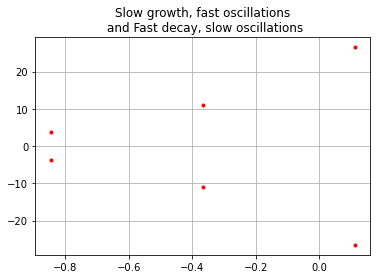

In [5]:
plt.plot(
    [val.real for val in eigvals], [val.imag for val in eigvals],
    "r."
)
plt.grid(True, "both", "both")
plt.title("Slow growth, fast oscillations\n and Fast decay, slow oscillations")

In [6]:
maes = [np.mean(np.abs(v1x_sim[:,mode] - v1x[mode,:])) for mode in range(6)]
rel_maes = [maes[mode]/np.max(v1x[mode,:]) for mode in range(6)]

fig = plt.figure(figsize=[6,4])
fig.suptitle("Relative MAE in mode reconstruction")
for mode in range(6):
    ax = fig.add_subplot(2, 3, mode+1)
    ax.plot(t1, v1x_sim[:,mode], "--", color=f"C{mode}", label=f"SINDy")
    ax.plot(t1, v1x[mode,:], "-", color=f"C{mode}", label=f"true")
    if mode == 0: ax.legend()
    ax.set_title(f"Mode {mode}: {rel_maes[mode]:.2f}")
    ax.set_yticks([])
    ax.set_xticks([])
fig.tight_layout()

NameError: name 'v1x_sim' is not defined

See pysindy [issue #372](https://github.com/dynamicslab/pysindy/issues/372)

# DMD

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt

from pydmd import DMD
from pydmd.bopdmd import BOPDMD

In [ ]:
optdmd = BOPDMD(svd_rank=6, num_trials=10)
optdmd.fit(Vx1flat, t1)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.scatter(
    np.real(optdmd.eigs), np.imag(optdmd.eigs), label="optDMD", marker="s"
)
ax.set_xlabel("Real part")
ax.set_ylabel("Imag part")
ax.legend()
ax.set_ylim(-60, 60)
ax.set_xlim(-4, 4)
ax.grid()
ax.axhline(0, color="0.6")
ax.axvline(0, color="0.6")
ax.set_title("Eigenvalues of DMD, optDMD, BOPDMD")
plt.show()

In [ ]:
(optdmd.dynamics.real.T[:,0]).shape


In [ ]:
plt.plot(optdmd.dynamics.real.T)
plt.legend()
plt.gca().set_xlabel("Time (-)")
plt.gca().set_ylabel("Normalized Dynamics (-)")
plt.show()


In [ ]:
(optdmd.modes[:,0]).real.shape

In [ ]:
fig = plt.figure(figsize=(15, 10))

for k in range(9):
    optdmd_spatial_modes = ((optdmd.modes[:,k]).real).reshape((119, 119), order='F')
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(optdmd_spatial_modes)


